### IMPORT THE LIBRARIES

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read the dataset

In [46]:
df = pd.read_csv("train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [47]:
df.shape

(550068, 12)

In [48]:
# checking for number of missing values/null values in each column
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
# checking number of unique values in each column
for i in df.columns:
    print(i,":",df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 20
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 18105


## Descriptive statistics of the dataset

In [51]:
# Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [52]:
df_drop = df.drop("User_ID",axis=1)  # we need to drop the column which is not in use 

In [53]:
summary = df_drop.describe()
summary = pd.DataFrame(summary)

In [54]:
summary

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### calculate the mean and standard deviation of the target var in train data 

In [55]:
mean = df['Purchase'].mean()
std_dev = df['Purchase'].std()
print('Mean:', mean)
print('Standard deviation:', std_dev)

Mean: 9263.968712959126
Standard deviation: 5023.065393820627


## Handling Null Values/ Missing values

inference: since product_category_2 and product_category_3 has large no of missing values will replace it by median

In [56]:
x = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(x, inplace=True)

In [57]:
y=df['Product_Category_3'].median()
df['Product_Category_3'].fillna(y, inplace=True)

In [58]:
### Dropping unwanted columns from the dataset (dropping columns like user_id and product_id )
df.drop(labels=['User_ID','Product_ID'],axis=1,inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


## EDA : exploratory data analysis

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


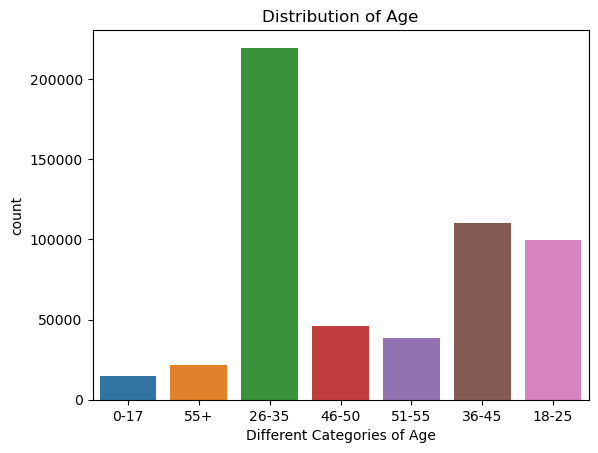

In [60]:
sns.countplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

### Checking correlation

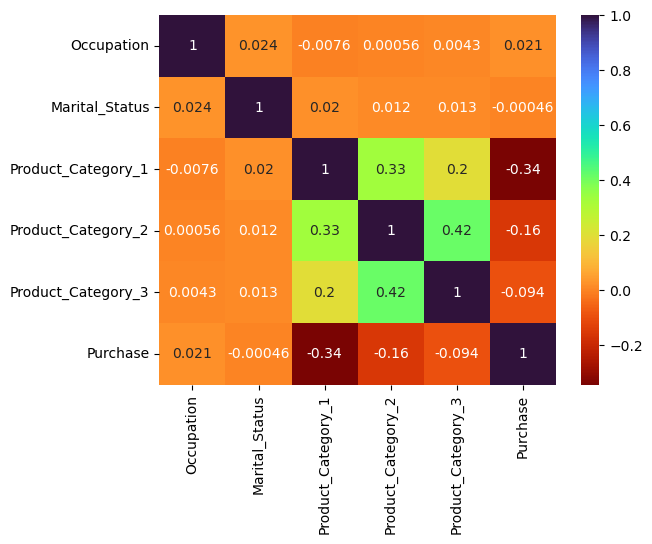

In [61]:
sns.heatmap(df.corr(),annot=True,cmap='turbo_r')
plt.show()

 inference : prod_category_1 , product_category_2 , product_category_3 and purchase shows negative correlation

## Plotting Target Variable

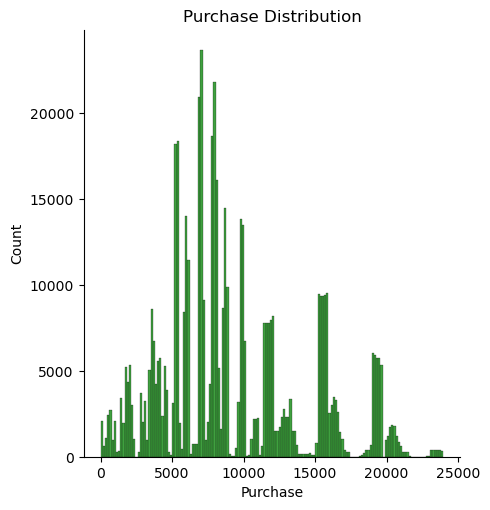

In [62]:
sns.displot(df["Purchase"],color='g')
plt.title("Purchase Distribution")
plt.show()

## ANALYSIS USING COUNTPLOT 

### 1) gender

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


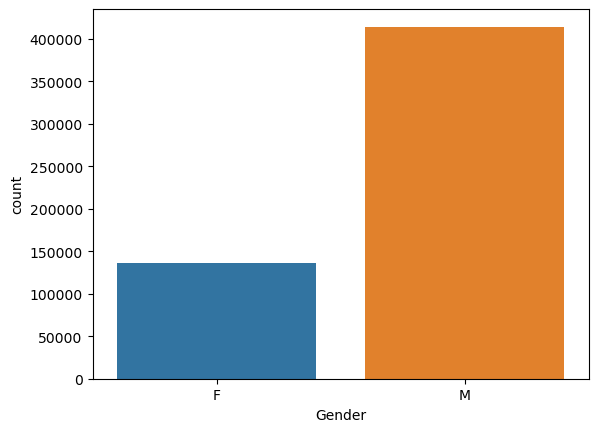

In [63]:
sns.countplot(df['Gender'])
plt.show()

### 2) Marital status

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


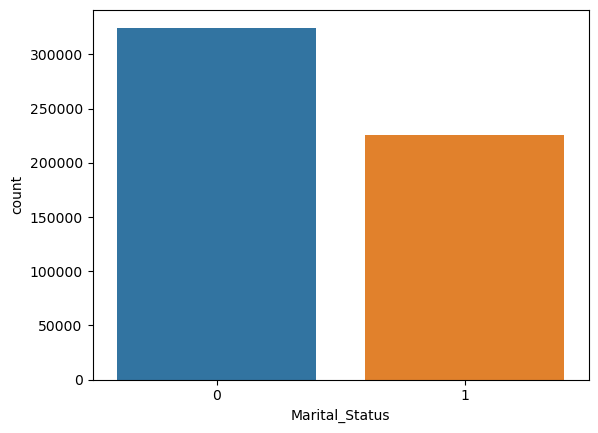

In [64]:
sns.countplot(df["Marital_Status"])
plt.show()

### BI-VARIATE ANALYSIS

### 1) Gender vs Purchase

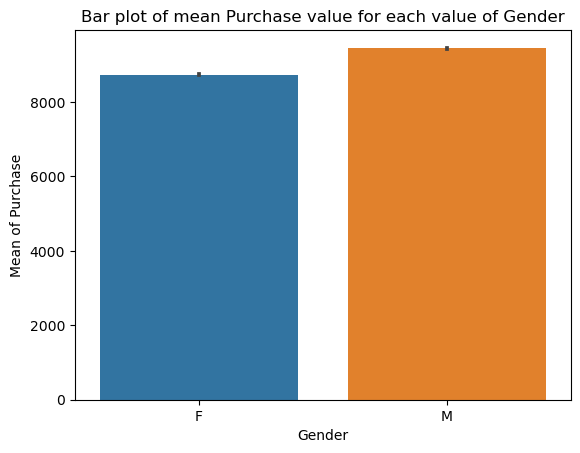

In [65]:
# A bar plot of the mean Purchase value for each value of Gender
sns.barplot(x='Gender', y='Purchase', data=df)
plt.xlabel('Gender')
plt.ylabel('Mean of Purchase')
plt.title('Bar plot of mean Purchase value for each value of Gender')
plt.show()

### 2) AGE VS PURCHASE

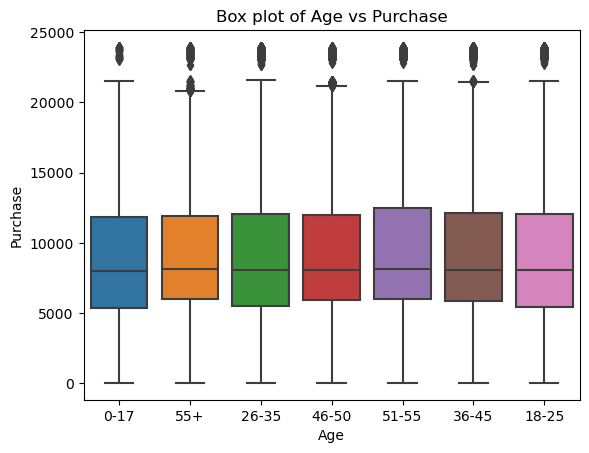

In [66]:
# Creating a box plot of Purchse with respect to Age
sns.boxplot(x='Age', y='Purchase', data=df)
plt.xlabel("Age")
plt.ylabel('Purchase')
plt.title('Box plot of Age vs Purchase')
plt.show()

### 3) GENDER VS PURCHASE VIOLINPLOT

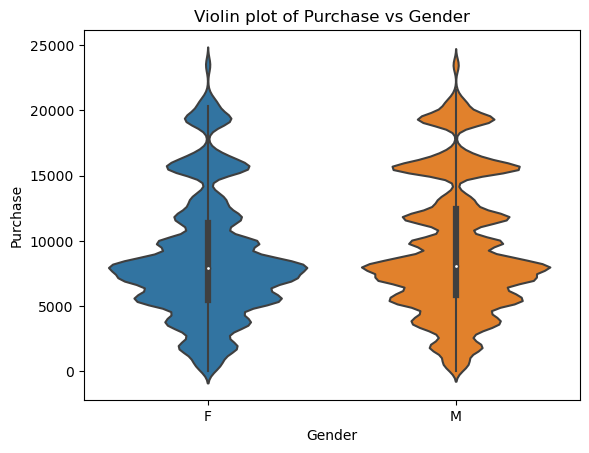

In [67]:
# Creating a violin plot of Purchase with respect to Gender
sns.violinplot(x='Gender', y='Purchase', data=df)
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.title('Violin plot of Purchase vs Gender')
plt.show()


### 4) CITY CATEGORY VS PURCHASE BARPLOT

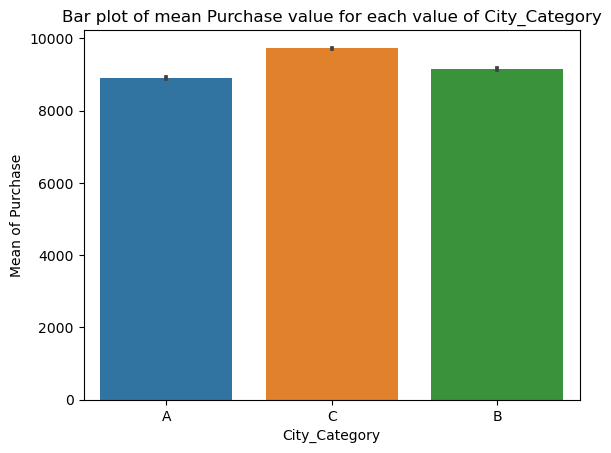

In [68]:
# A bar plot of the mean Purchase value for each value of City_Category
sns.barplot(x='City_Category', y='Purchase', data=df)
plt.xlabel('City_Category')
plt.ylabel('Mean of Purchase')
plt.title('Bar plot of mean Purchase value for each value of City_Category')
plt.show()

INFERENCE : CITY_CATEGORY_C HAS THE HIGHEST PURCHASE

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


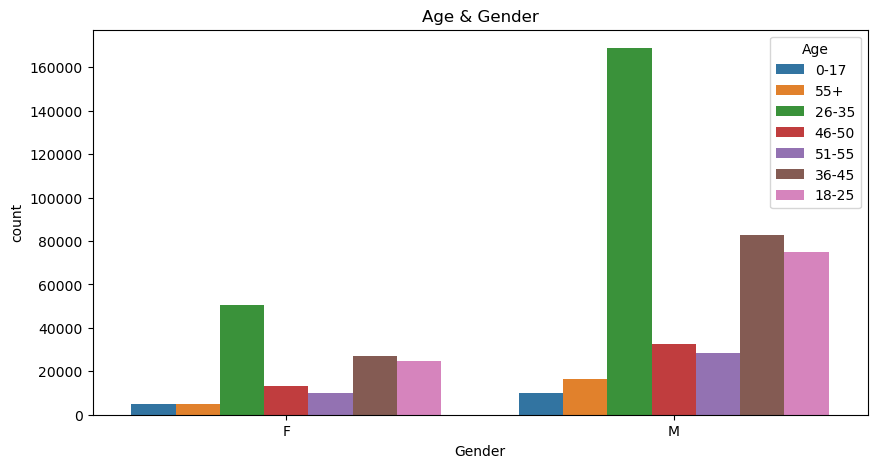

In [69]:
plt.figure(figsize = (10, 5))
sns.countplot(df["Gender"], hue = df["Age"]).set_title("Age & Gender")
plt.show()

### City Category pie chart

<AxesSubplot:title={'center':'City Category'}, ylabel='Purchase'>

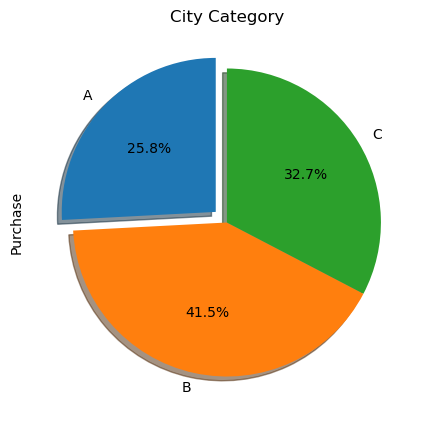

In [70]:
plt.figure(figsize = (10, 5))
df.groupby("City_Category")["Purchase"].sum().plot.pie(title = "City Category", 
                                                               startangle = 90, explode = (0.1, 0, 0), 
                                                               autopct = "%1.1f%%", shadow = True)

### Occupation vs Purchase

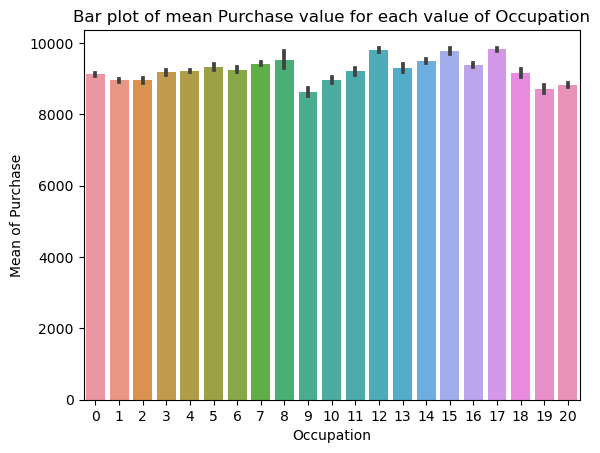

In [71]:
# A bar plot of the mean Purchase value for each value of Occupation
sns.barplot(x='Occupation', y='Purchase', data=df)
plt.xlabel('Occupation')
plt.ylabel('Mean of Purchase')
plt.title('Bar plot of mean Purchase value for each value of Occupation')
plt.show()

## Data Standardization

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]=scaler.fit_transform(df[['Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']])

In [73]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.403835,0.409653,0.231804,0.473527,0.706408,0.386320
std,0.326133,0.491770,0.207169,0.264127,0.156858,0.209740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.000000,0.000000,0.375000,0.733333,0.242641
50%,0.350000,0.000000,0.210526,0.437500,0.733333,0.335505
75%,0.700000,1.000000,0.368421,0.750000,0.733333,0.502818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


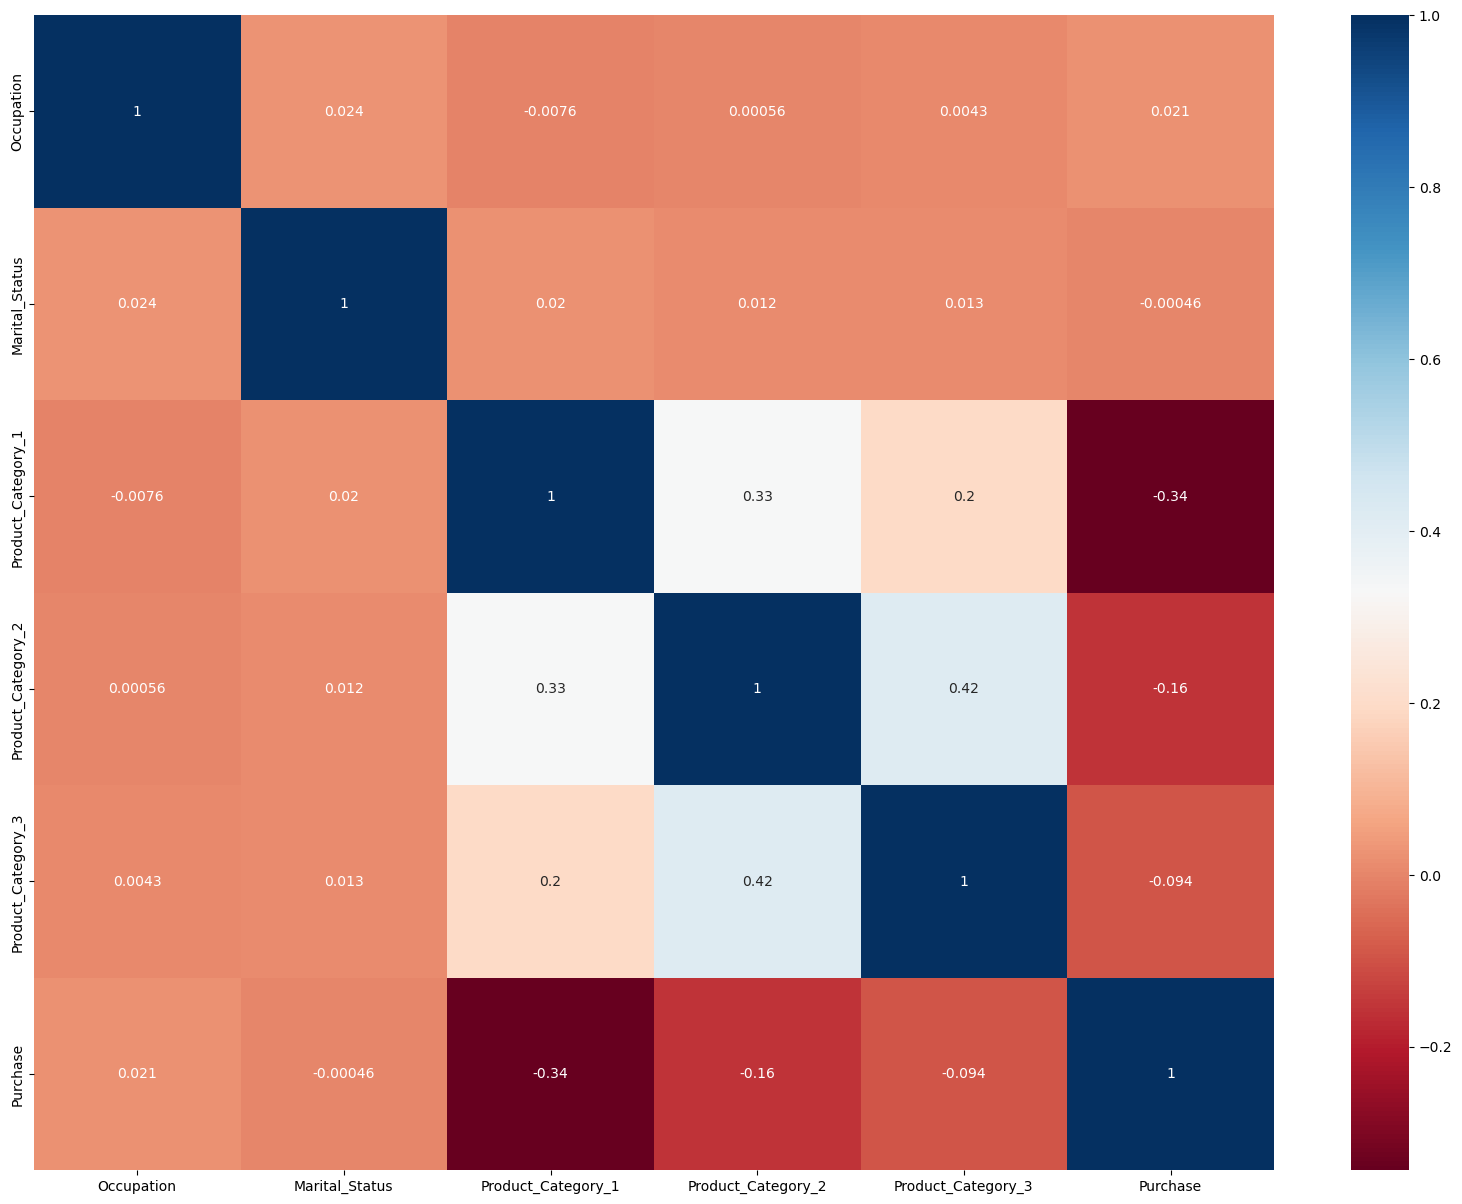

In [74]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.show()

### Conversion of  Categorical Variable into integer using LabelEncoder

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
# here we change the gender, age and city category into numbers using label encoder

df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = le.fit_transform(df['Age'])
df['City_Category'] = le.fit_transform(df['City_Category'])

In [81]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [82]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+',"") # changing the '+' sign 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11804\263220987.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+',"") # changing the '+' sign


In [83]:
df['Stay_In_Current_City_Years'].unique()


array(['2', '4', '3', '1', '0'], dtype=object)

In [84]:
 ### df["Stay_In_Current_City_Years"] is in string/object form we need to change it integer form  
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

## Splitting the dataset into train and test

In [85]:
x= df.drop("Purchase",axis=1)
y=df['Purchase']

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Linear Regression

In [87]:
# function to evaluate the model.
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('Mean Absolute Error: ',mae)
    print('Meam squared error: ',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred = lr.predict(x_test)  #predict always applies on test 

In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [92]:
eval_model(y_test,y_pred)

Mean Absolute Error:  0.14971275498511458
Meam squared error:  0.038337173891633804
RMSE 0.19579880972986993
R2_Score 0.12721898357679284


In [93]:
r2_lr= r2_score(y_test,y_pred)

## Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
RFregressor = RandomForestRegressor(random_state = 101) 
RFregressor.fit(x_train, y_train)

RandomForestRegressor(random_state=101)

In [97]:
RF_y_pred = RFregressor.predict(x_test)

In [98]:
eval_model(y_test,RF_y_pred)

Mean Absolute Error:  0.09278805152480235
Meam squared error:  0.016253005418284738
RMSE 0.12748727551518518
R2_Score 0.6299853862728765


In [99]:
r2_RF = r2_score(y_test,RF_y_pred)

## XGBOOST Regressor

In [100]:
from xgboost.sklearn import XGBRegressor

In [101]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [102]:
xgb_y_pred = xgb_reg.predict(x_test)

In [103]:
eval_model(y_test,xgb_y_pred)

Mean Absolute Error:  0.08968211140748479
Meam squared error:  0.014450594904548647
RMSE 0.120210627252954
R2_Score 0.6710189190167639


In [104]:
r2_XG = r2_score(y_test,xgb_y_pred)

### PERFORMANCE EVALUATION FOR ALL THE MODELS

In [105]:
ev_r2=[r2_lr,r2_RF,r2_XG]
print(ev_r2)
labels=['Linear','Random Forest','XGBoost']

[0.12721898357679284, 0.6299853862728765, 0.6710189190167639]


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


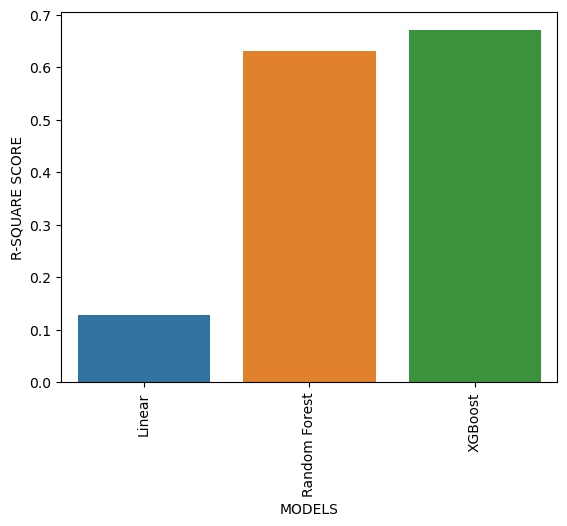

In [106]:
sns.barplot(labels,ev_r2)
plt.ylabel('R-SQUARE SCORE')

plt.xlabel('MODELS')
plt.xticks(rotation=90)
plt.show()

### KNN REGRESSOR MODEL

In [107]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x, y)
neigh_pred = neigh.predict(x_test)
print(neigh_pred)

[0.24600192 0.25044887 0.22090693 ... 0.25211909 0.31458516 0.49202472]


In [108]:
# MEAN SQUARE ERROR
mse_knn=mean_squared_error(y_test, neigh_pred)
print(mse_knn)

0.015340519985913695


In [109]:
# R-SQUARED SCORE

r2_knn=r2_score(y_test, neigh_pred)
print(r2_knn)

0.6507589562127818


In [110]:
# ROOT-MEAN SQUARE ERROR 

from math import sqrt
rmse_knn=sqrt(mean_squared_error(y_test, neigh_pred))
print("RMSE of KNN Regression Model is ",rmse_knn)

RMSE of KNN Regression Model is  0.12385685280158582


### DECISION TREE REGRESSOR

In [111]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)

In [112]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [113]:
dt_y_pred = regressor.predict(x_test)

In [114]:
# MEAN ABSOLUTE ERROR
mean_absolute_error(y_test, dt_y_pred)

0.098488309776684

In [115]:
# MEAN SQUARED ERROR
mse_dt=mean_squared_error(y_test, dt_y_pred)
print(mse_dt)

0.019445970934186117


In [116]:
# R-SQUARE SCORE

r2_dt=r2_score(y_test, dt_y_pred)
print(r2_dt)

0.5572945902259409


In [117]:
# ROOT MEAN SQUARE ERROR
rmse_dt=sqrt(mean_squared_error(y_test, dt_y_pred))
print("RMSE of Decision tree regressor Model is ",rmse_dt)

RMSE of Decision tree regressor Model is  0.139448811160892


#### CONCLUSION : WE HAVE USED 
1) LINEAR REGRESSION 
2) RANDOM FOREST REGRESSOR 
3) XGBoost REGRESSOR
4) KNN REGRESSOR 
5) DECISION TREE REGRESSOR 

## Test File/Data

In [119]:
test = pd.read_csv("test.csv")

In [120]:
test.shape

(233599, 11)

In [121]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [122]:
x = test['Product_Category_2'].median()
test['Product_Category_2'].fillna(x, inplace=True)

In [123]:
y=test['Product_Category_3'].median()
test['Product_Category_3'].fillna(y, inplace=True)

In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          233599 non-null  float64
 10  Product_Category_3          233599 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [125]:
test.drop(["User_ID","Product_ID"],axis=1,inplace=True)

In [126]:
# here we change the gender, age and city category into numbers using label encoder

test['Gender'] = le.fit_transform(test['Gender'])
test['Age'] = le.fit_transform(test['Age'])
test['City_Category'] = le.fit_transform(test['City_Category'])

In [127]:
test["Stay_In_Current_City_Years"].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [128]:
test["Stay_In_Current_City_Years"] = test["Stay_In_Current_City_Years"].str.replace('+',"")   # changing the '+' sign 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11804\364527989.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test["Stay_In_Current_City_Years"] = test["Stay_In_Current_City_Years"].str.replace('+',"")   # changing the '+' sign


In [129]:
 ### test["Stay_In_Current_City_Years"] is in string/object form we need to change it integer form  
test["Stay_In_Current_City_Years"] = test["Stay_In_Current_City_Years"].astype(int)

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  int32  
 1   Age                         233599 non-null  int32  
 2   Occupation                  233599 non-null  int64  
 3   City_Category               233599 non-null  int32  
 4   Stay_In_Current_City_Years  233599 non-null  int32  
 5   Marital_Status              233599 non-null  int64  
 6   Product_Category_1          233599 non-null  int64  
 7   Product_Category_2          233599 non-null  float64
 8   Product_Category_3          233599 non-null  float64
dtypes: float64(2), int32(4), int64(3)
memory usage: 12.5 MB


### Data Standardization

In [131]:
scaler=MinMaxScaler()
test[['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']]=scaler.fit_transform(test[['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']])

### Xgboost regressor

In [132]:
result = xgb_reg.predict(test)

In [133]:
result

array([0.6157342 , 0.43217337, 0.28777957, ..., 0.5227364 , 0.21588586,
       0.06219554], dtype=float32)